In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle

from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout,GlobalAveragePooling2D
from keras.models import Model

from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Concatenate
from keras.layers import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.layers import Layer
from keras.regularizers import l2
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau



In [ ]:
dir_list = next(os.walk('/content/drive/MyDrive/signature/BHSig260/Hindi/'))[1]
#dir_list


In [ ]:
dir_list.sort()
#dir_list

In [ ]:
orig_groups, forg_groups = [], []
for directory in dir_list:
    images = os.listdir('/content/drive/MyDrive/signature/BHSig260/Hindi/'+directory)
    images.sort()
    images = ['/content/drive/MyDrive/signature/BHSig260/Hindi/'+directory+'/'+x for x in images]
    forg_groups.append(images[:30])
    orig_groups.append(images[30:])

In [ ]:
len(orig_groups), len(forg_groups)

(160, 160)

In [ ]:
orig_groups[0]

['/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-01.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-02.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-03.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-04.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-05.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-06.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-07.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-08.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-09.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-10.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-11.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-12.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-13.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/001/H-S-1-G-14.tif',
 '/con

In [ ]:
forg_groups[1]

['/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-01.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-02.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-03.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-04.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-05.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-06.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-07.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-08.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-09.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-10.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-11.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-12.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-13.tif',
 '/content/drive/MyDrive/signature/BHSig260/Hindi/002/H-S-2-F-14.tif',
 '/con

In [ ]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]

In [ ]:
print(orig_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 29, 24, 24, 24, 24, 24, 24, 34, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 30, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 28, 24, 24, 24, 24, 24, 24, 27, 24, 24, 24, 24, 24, 24, 24, 25, 31, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 37, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


In [ ]:
print(forg_lengths)

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


In [ ]:
orig_train, orig_val, orig_test = orig_groups[:120], orig_groups[120:140], orig_groups[140:]
forg_train, forg_val, forg_test = forg_groups[:120], forg_groups[120:140], forg_groups[140:]

In [ ]:
del orig_groups, forg_groups

In [ ]:
img_h, img_w = 155, 220

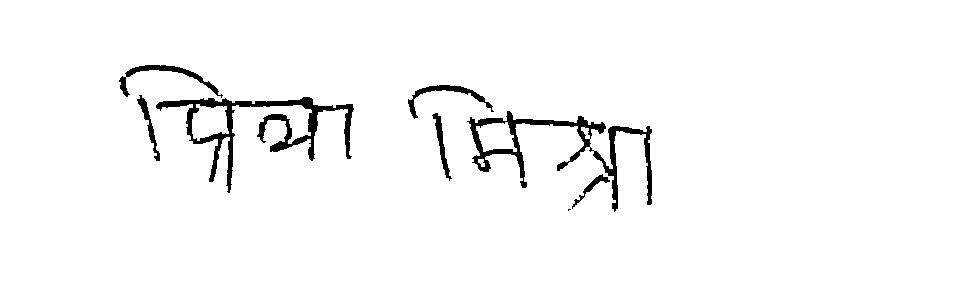

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def harris_corner_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    corners = cv2.dilate(corners, None)
    img_corners = np.copy(image)
    img_corners[corners > 0.1* corners.max()] = [255, 255, 255]

    return img_corners

# Load the image
image = cv2.imread('/content/drive/MyDrive/signature/BHSig260/Hindi/140/H-S-140-F-01.tif')
result = harris_corner_detection(image)
result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
cv2_imshow(result)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def harris_corners(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    corners = cv2.dilate(corners, None)
    image[corners > 0.1 * corners.max()] = [255, 255, 255]
    return image

In [ ]:
import matplotlib.pyplot as plt
def visualize_sample_signature():
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 15))
  k = np.random.randint(len(orig_train))
  orig_img_names = random.sample(orig_train[k], 2)
  forg_img_name = random.sample(forg_train[k], 1)
  print(orig_img_names[0])

  orig_img1 = cv2.imread(orig_img_names[0], 0)
  orig_img2 = cv2.imread(orig_img_names[1], 0)
  forg_img = cv2.imread(forg_img_name[0], 0)
  i1 = cv2.imread(orig_img_names[0])
  i2 = cv2.imread(orig_img_names[1])
  f1 = cv2.imread(forg_img_name[0])
  h1 = harris_corners(i1)
  h2 = harris_corners(i2)
  h3 = harris_corners(f1)
  orig_img1 = cv2.resize(orig_img1, (img_w, img_h))
  orig_img2 = cv2.resize(orig_img2, (img_w, img_h))
  forg_img = cv2.resize(forg_img, (img_w, img_h))

  ax1.imshow(h1)
  ax2.imshow(h2)
  ax3.imshow(h3)
  # ax1.imshow(orig_img1, cmap = 'gray')
  # ax2.imshow(orig_img2, cmap = 'gray')
  # ax3.imshow(forg_img, cmap = 'gray')

  ax1.set_title('Genuine Copy')
  ax1.axis('off')
  ax2.set_title('Genuine Copy')
  ax2.axis('off')
  ax3.set_title('Forged Copy')
  ax3.axis('off')
  plt.show()

/content/drive/MyDrive/signature/BHSig260/Hindi/097/H-S-97-G-08.tif


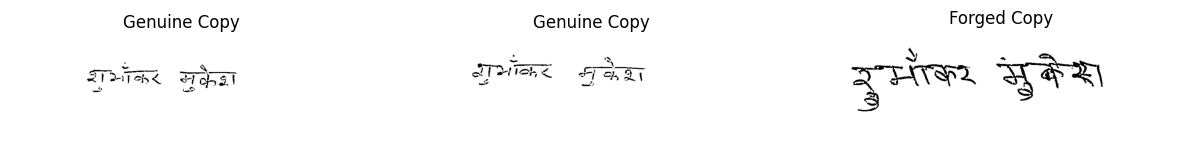

In [ ]:
visualize_sample_signature()

In [ ]:
def generate_batch(orig_groups, forg_groups, batch_size = 32):
    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []

        for orig, forg in zip(orig_groups, forg_groups):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
                forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, 12))))

        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)

        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)


        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, 1)) for i in range(2)]

        targets=np.zeros((batch_size,))

        for ix, pair in enumerate(all_pairs):
            img1 = cv2.imread(pair[0])
            img2 = cv2.imread(pair[1])
            img1 = harris_corners(img1)
            img2 = harris_corners(img2)
            img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
            img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
            img1 = cv2.resize(img1, (img_w, img_h))
            img2 = cv2.resize(img2, (img_w, img_h))
            img1 = np.array(img1, dtype = np.float64)
            img2 = np.array(img2, dtype = np.float64)
            img1 /= 255
            img2 /= 255
            img1 = img1[..., np.newaxis]
            img2 = img2[..., np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]
            k += 1
            if k == batch_size:
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, 1)) for i in range(2)]
                targets=np.zeros((batch_size,))

    return pairs, targets

In [ ]:
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

In [ ]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [ ]:
def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))
def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))


In [74]:
def create_base_network_signet(input_shape):

    seq = Sequential()
    seq.add(Conv2D(96, kernel_size=(11, 11), activation='relu', name='conv1_1', strides=4, input_shape= input_shape))
    seq.add(BatchNormalization())
    seq.add(MaxPooling2D((2,2), strides=(1,1)))
    seq.add(Dropout(0.3))

    seq.add(Conv2D(256, kernel_size=(5, 5), activation='relu', name='conv2_1'))
    seq.add(BatchNormalization())
    seq.add(MaxPooling2D((2,2), strides=(1,1)))
    seq.add(Dropout(0.3))

    seq.add(Conv2D(512, kernel_size=(3, 3), activation='relu', name='conv3_1'))
    seq.add(MaxPooling2D((2,2), strides=(1,1)))
    seq.add(Dropout(0.3))

    seq.add(GlobalAveragePooling2D())
    seq.add(Dense(128, activation='relu'))
    return seq

In [75]:
input_shape=(img_h, img_w, 1)
input_shape

(155, 220, 1)

In [76]:
base_network = create_base_network_signet(input_shape)
input_a = Input(shape=(input_shape))
input_b = Input(shape=(input_shape))

processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = Model(inputs=[input_a, input_b], outputs=distance)
print(model.summary())

Model: "functional_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 155, 220, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_8             │ (None, 155, 220, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_6 (Sequential) │ (None, 128)            │      1,873,600 │ input_layer_7[0][0],   │
│                           │                        │                │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 1)              │              0 │ sequential_6[0][0],    │
│                           │                        │                │ sequential_6[1][0]     │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,873,600 (7.15 MB)

 Trainable params: 1,872,896 (7.14 MB)

 Non-trainable params: 704 (2.75 KB)

None


In [146]:
batch_sz = 128
num_train_samples = 276*80 + 300*80
num_val_samples = num_test_samples = 276*20 + 300*20
num_train_samples, num_val_samples, num_test_samples

(46080, 11520, 11520)

In [147]:
rms = RMSprop(learning_rate=1e-4)
model.compile(loss=contrastive_loss, optimizer=rms,metrics=[accuracy])

In [150]:
callbacks = [
    EarlyStopping(patience=3, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.000001, verbose=1),
    ModelCheckpoint('/content/drive/MyDrive/signature/BHSig260/model_1.h5', verbose=1, save_weights_only=True)
]

In [ ]:
 results = model.fit(generate_batch(orig_train, forg_train, batch_sz),
                              steps_per_epoch = num_train_samples//batch_sz,
                              epochs = 20,
                              validation_data = generate_batch(orig_val, forg_val, batch_sz),
                              validation_steps = num_val_samples//batch_sz,
                              callbacks = callbacks)

Epoch 1/20
360/360 [==============================] - ETA: 0s - loss: 0.1290 - accuracy: 0.8467
Epoch 1: saving model to /content/drive/MyDrive/signature/BHSig260/model_1.h5
360/360 [==============================] - 3080s 9s/step - loss: 0.1290 - accuracy: 0.8967 - val_loss: 0.1615 - val_accuracy: 0.7391 - lr: 1.0000e-04

Epoch 2/20
360/360 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.
9435
Epoch 2: saving model to /content/drive/MyDrive/signature/BHSig260/model_1.h5
360/360 [==============================] - 1020s 3s/step - loss: 0.0663 - accuracy: 0.9135 - val_loss: 0.1366 - val_accuracy: 0.8214 - lr: 1.0000e-04

Epoch 3/20
360/360 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9741
Epoch 3: saving model to /content/drive/MyDrive/signature/BHSig260/model_1.h5
360/360 [==============================] - 1042s 3s/step - loss: 0.0426 - accuracy: 0.9241 - val_loss: 0.1440 - val_accuracy: 0.7855 - lr: 1.0000e-04

Epoch 4/20
 12/360 [>.............................] - ETA: 4:28 - loss: 0.0354 - accuracy: 0.9205

In [ ]:
test_gen = generate_batch(orig_test, forg_test, 1)
def predict_score():
    test_point, test_label = next(test_gen)
    img1, img2 = test_point[0], test_point[1]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(np.squeeze(img1), cmap='gray')
    ax2.imshow(np.squeeze(img2), cmap='gray')
    ax1.set_title('Genuine')
    if test_label == 1:
        ax2.set_title('Genuine')
    else:
        ax2.set_title('Forged')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    result = model.predict([img1, img2])
    diff = result[0][0]
    print("Difference Score = ", diff)
    if diff > threshold:
        print("Its a Forged Signature")
    else:
        print("Its a Genuine Signature")

In [ ]:
def compute_accuracy_roc(predictions, labels):

    dmax = np.max(predictions)
    dmin = np.min(predictions)
    nsame = np.sum(labels == 1)
    ndiff = np.sum(labels == 0)

    step = 0.01
    max_acc = 0
    best_thresh = -1

    for d in np.arange(dmin, dmax+step, step):
        idx1 = predictions.ravel() <= d
        idx2 = predictions.ravel() > d

        tpr = float(np.sum(labels[idx1] == 1)) / nsame
        tnr = float(np.sum(labels[idx2] == 0)) / ndiff
        acc = 0.5 * (tpr + tnr)

        if (acc > max_acc):
            max_acc, best_thresh = acc, d

    return max_acc, best_thresh

In [1]:
tr_acc, threshold = compute_accuracy_roc(np.array(pred), np.array(tr_y))
tr_acc, threshold

(0.9206738467517551, 0.032787647753954)

In [77]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Dense, Dropout, Flatten

def create_model(input_shape=(155, 220, 1)):
    model = Sequential()

    # Conv1 Layer
    model.add(Conv2D(96, (11, 11), strides=4, activation='relu', name='conv1_1', input_shape=input_shape))
    model.add(BatchNormalization(name='batch_normalization'))

    # Conv2 Layer
    model.add(Conv2D(256, (5, 5), activation='relu', name='conv2_1'))
    model.add(BatchNormalization(name='batch_normalization_1'))

    # Conv3 Layer
    model.add(Conv2D(512, (3, 3), activation='relu', name='conv3_1'))

    # Flatten before Dense Layer
    model.add(Flatten())

    # Dense Layer
    model.add(Dense(128, activation='relu', name='dense'))

    return model

# Reconstruct the model
model = create_model()

# Load the weights from the saved file
model.load_weights('/content/drive/MyDrive/signature/BHSig260/model_1.h5', by_name=True,skip_mismatch=True)

# Print model summary to ensure correct reconstruction
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                     │ (None, 37, 53, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 37, 53, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2_1 (Conv2D)                     │ (None, 33, 49, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 33, 49, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3_1 (Conv2D)                     │ (None, 31, 47, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 745984)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      95,486,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,294,016 (371.15 MB)

 Trainable params: 97,293,312 (371.14 MB)

 Non-trainable params: 704 (2.75 KB)

In [126]:
threshold = 0.032
test_gen = generate_batch(orig_test, forg_test, 1)
def predict_score():
    test_point, test_label = next(test_gen)
    img1, img2 = test_point[0], test_point[1]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(np.squeeze(img1), cmap='gray')
    ax2.imshow(np.squeeze(img2), cmap='gray')
    ax1.set_title('Genuine')
    if test_label == 1:
        ax2.set_title('Genuine')
    else:
        ax2.set_title('Forged')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    result = model.predict([img1, img2])
    diff = result[0][0]
    print("Difference Score = ", diff)
    if diff > threshold:
        print("Its a Forged Signature")
    else:
        print("Its a Genuine Signature")

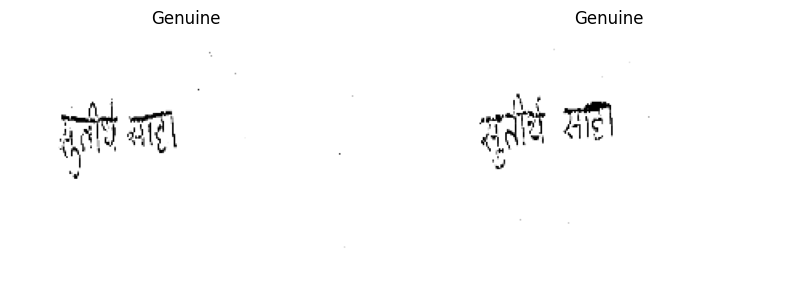

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Difference Score =  0.024819504
Its a Genuine Signature


In [84]:
predict_score()

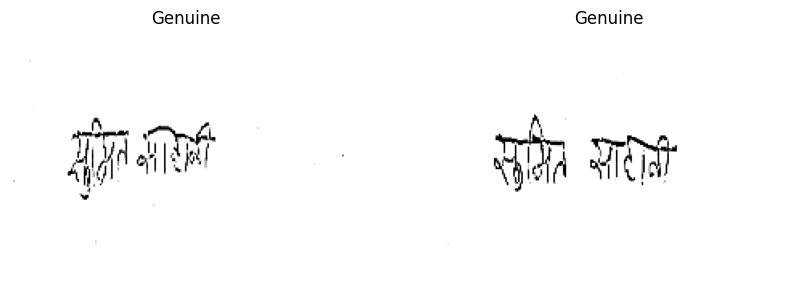

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Difference Score =  0.019338368
Its a Genuine Signature


In [88]:
predict_score()

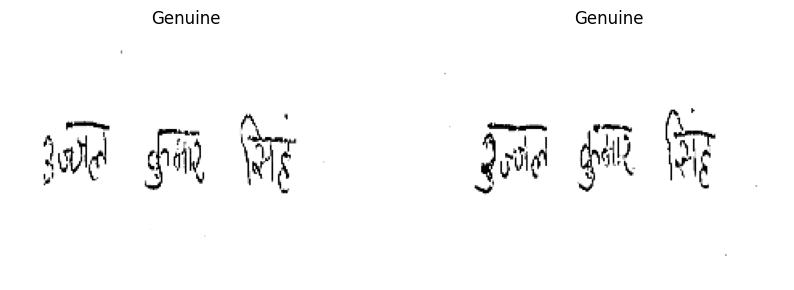

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Difference Score =  0.02625863
Its a Genuine Signature


In [89]:
predict_score()

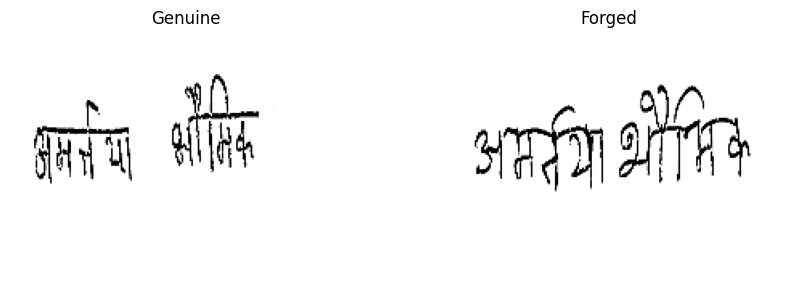

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Difference Score =  0.0397135
Its a Forged Signature


In [92]:
predict_score()

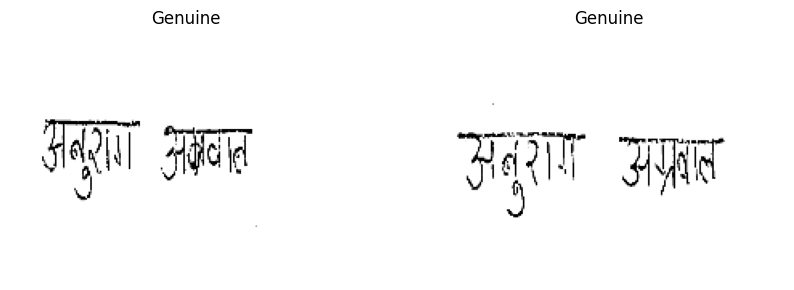

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Difference Score =  0.023632083
Its a Genuine Signature


In [93]:
predict_score()

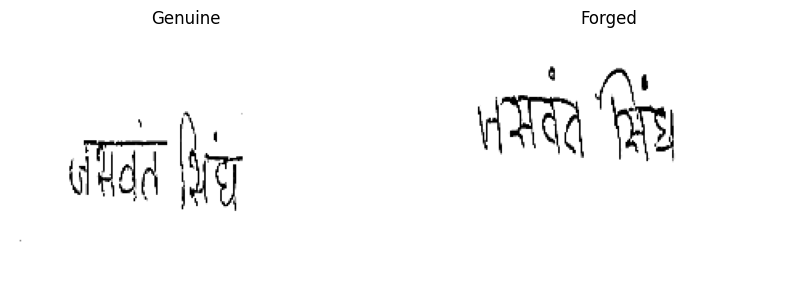

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Difference Score =  0.037275907
Its a Forged Signature


In [97]:
predict_score()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


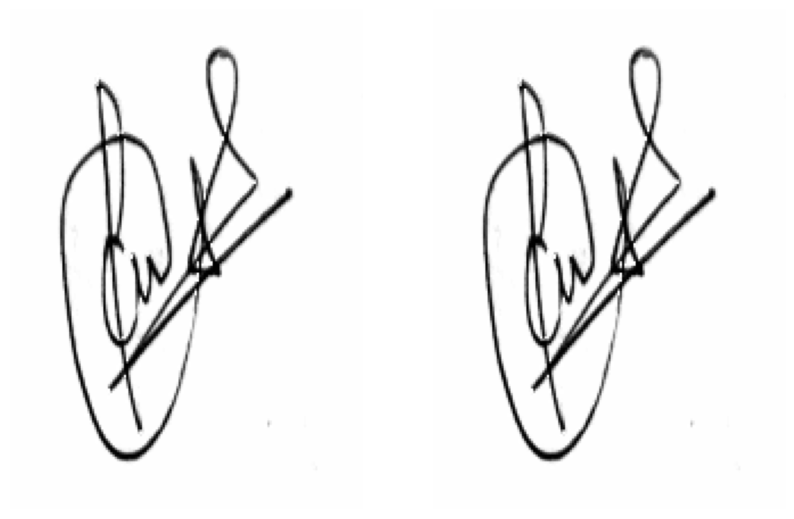

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Difference Score =  0.017793048
Its a Genuine Signature


In [112]:
#Testing manually
pairs=[np.zeros((1, img_h, img_w, 1)) for i in range(2)]
#targets=np.zeros((batch_size,))
img1 = cv2.imread("/content/drive/MyDrive/signature/k_g.png")
img2 = cv2.imread("/content/drive/MyDrive/signature/k_g1.png")
img1 = harris_corners(img1)
img2 = harris_corners(img2)
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img1 = cv2.resize(img1, (155,220))
img2 = cv2.resize(img2, (155,220))
img1 = np.array(img1, dtype = np.float64)
img2 = np.array(img2, dtype = np.float64)
img1 /= 255
img2 /= 255
img1 = img1[..., np.newaxis]
img2 = img2[..., np.newaxis]


pred, tr_y = [], []
tr_y = 1
model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])[0][0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
ax1.imshow(np.squeeze(img1), cmap='gray')
ax2.imshow(np.squeeze(img2), cmap='gray')


ax1.axis('off')
ax2.axis('off')
plt.show()
result = model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])
diff = result[0][0]
print("Difference Score = ", diff)
if diff > threshold:
    print("Its a Forged Signature")
else:
    print("Its a Genuine Signature")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


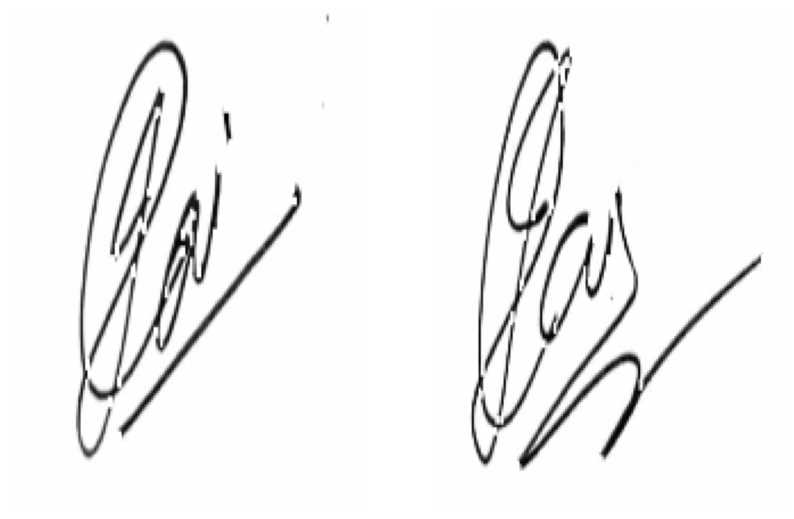

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Difference Score =  0.04435189
Its a Forged Signature


In [107]:
#Testing manually
pairs=[np.zeros((1, img_h, img_w, 1)) for i in range(2)]
#targets=np.zeros((batch_size,))
img1 = cv2.imread("/content/drive/MyDrive/signature/j_g.png")
img2 = cv2.imread("/content/drive/MyDrive/signature/j_f.png")
img1 = harris_corners(img1)
img2 = harris_corners(img2)
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img1 = cv2.resize(img1, (155,220))
img2 = cv2.resize(img2, (155,220))
img1 = np.array(img1, dtype = np.float64)
img2 = np.array(img2, dtype = np.float64)
img1 /= 255
img2 /= 255
img1 = img1[..., np.newaxis]
img2 = img2[..., np.newaxis]


pred, tr_y = [], []
tr_y = 1
model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])[0][0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
ax1.imshow(np.squeeze(img1), cmap='gray')
ax2.imshow(np.squeeze(img2), cmap='gray')


ax1.axis('off')
ax2.axis('off')
plt.show()
result = model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])
diff = result[0][0]
print("Difference Score = ", diff)
if diff > threshold:
    print("Its a Forged Signature")
else:
    print("Its a Genuine Signature")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


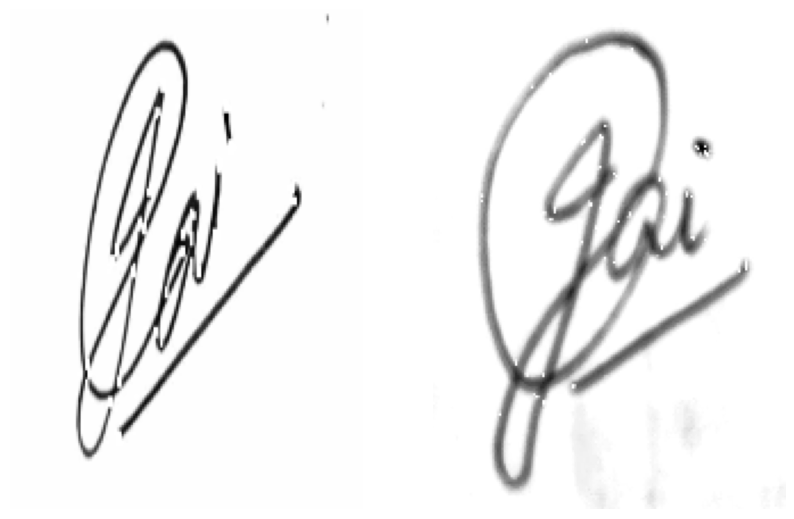

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Difference Score =  0.04435189
Its a Forged Signature


In [110]:
#Testing manually
pairs=[np.zeros((1, img_h, img_w, 1)) for i in range(2)]
#targets=np.zeros((batch_size,))
img1 = cv2.imread("/content/drive/MyDrive/signature/j_g.png")
img2 = cv2.imread("/content/drive/MyDrive/signature/j_f1.png")
img1 = harris_corners(img1)
img2 = harris_corners(img2)
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img1 = cv2.resize(img1, (155,220))
img2 = cv2.resize(img2, (155,220))
img1 = np.array(img1, dtype = np.float64)
img2 = np.array(img2, dtype = np.float64)
img1 /= 255
img2 /= 255
img1 = img1[..., np.newaxis]
img2 = img2[..., np.newaxis]


pred, tr_y = [], []
tr_y = 1
model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])[0][0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
ax1.imshow(np.squeeze(img1), cmap='gray')
ax2.imshow(np.squeeze(img2), cmap='gray')


ax1.axis('off')
ax2.axis('off')
plt.show()
result = model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])
diff = result[0][0]
print("Difference Score = ", diff)
if diff > threshold:
    print("Its a Forged Signature")
else:
    print("Its a Genuine Signature")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


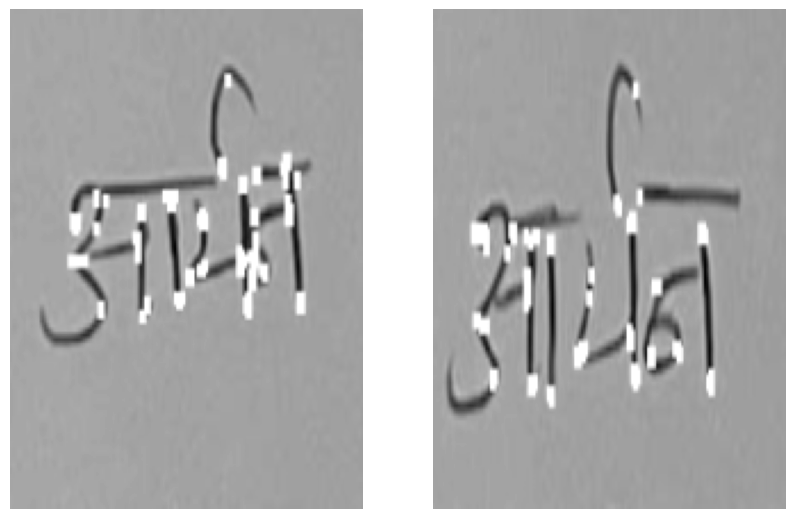

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Difference Score =  0.021487448
Its a Genuine Signature


In [122]:
#Testing manually
pairs=[np.zeros((1, img_h, img_w, 1)) for i in range(2)]
#targets=np.zeros((batch_size,))
img1 = cv2.imread("/content/drive/MyDrive/signature/ah_g2.png")
img2 = cv2.imread("/content/drive/MyDrive/signature/ah_g1.png")
img1 = harris_corners(img1)
img2 = harris_corners(img2)
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img1 = cv2.resize(img1, (155,220))
img2 = cv2.resize(img2, (155,220))
img1 = np.array(img1, dtype = np.float64)
img2 = np.array(img2, dtype = np.float64)
img1 /= 255
img2 /= 255
img1 = img1[..., np.newaxis]
img2 = img2[..., np.newaxis]


pred, tr_y = [], []
tr_y = 1
model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])[0][0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
ax1.imshow(np.squeeze(img1), cmap='gray')
ax2.imshow(np.squeeze(img2), cmap='gray')


ax1.axis('off')
ax2.axis('off')
plt.show()
result = model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])
diff = result[0][0]
print("Difference Score = ", diff)
if diff > threshold:
    print("Its a Forged Signature")
else:
    print("Its a Genuine Signature")